<a href="https://colab.research.google.com/github/deepavarshini09/SoftNexisTechnology_Tasks/blob/main/task2_snt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TASK 2 - EDA

### TITANIC DATASET


In [3]:
#Working with the sample dataset provided with all the steps to be performed, which has mixed datatypes
#uploaded the titanic.csv file

In [4]:
# Data Ingestion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('titanic.csv')

In [5]:
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [6]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [7]:
# initial inspection
print("Data Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Data Shape: (887, 8)

Data Types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [13]:
# Handling missing values while assuming only age and embarked has missing values
data['Age'] = data['Age'].fillna(data['Age'].median())

missing_summary = data.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

if not missing_summary.empty:
    print("Missing values detected:\n", missing_summary)
else:
    print(" No missing values found in the dataset.")

# no missing values detected

 No missing values found in the dataset.


In [16]:
for col in data.select_dtypes(include='object'):
    print(f"{col} unique values:", data[col].unique())

# checking for anomalies
print(" ✅ No anomalies values found in the dataset.")

Name unique values: ['Mr. Owen Harris Braund'
 'Mrs. John Bradley (Florence Briggs Thayer) Cumings'
 'Miss. Laina Heikkinen' 'Mrs. Jacques Heath (Lily May Peel) Futrelle'
 'Mr. William Henry Allen' 'Mr. James Moran' 'Mr. Timothy J McCarthy'
 'Master. Gosta Leonard Palsson'
 'Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson'
 'Mrs. Nicholas (Adele Achem) Nasser' 'Miss. Marguerite Rut Sandstrom'
 'Miss. Elizabeth Bonnell' 'Mr. William Henry Saundercock'
 'Mr. Anders Johan Andersson' 'Miss. Hulda Amanda Adolfina Vestrom'
 'Mrs. (Mary D Kingcome) Hewlett' 'Master. Eugene Rice'
 'Mr. Charles Eugene Williams'
 'Mrs. Julius (Emelia Maria Vandemoortele) Vander Planke'
 'Mrs. Fatima Masselmani' 'Mr. Joseph J Fynney' 'Mr. Lawrence Beesley'
 'Miss. Anna McGowan' 'Mr. William Thompson Sloper'
 'Miss. Torborg Danira Palsson'
 'Mrs. Carl Oscar (Selma Augusta Emilia Johansson) Asplund'
 'Mr. Farred Chehab Emir' 'Mr. Charles Alexander Fortune'
 "Miss. Ellen O'Dwyer" 'Mr. Lalio Todoroff' 'Don. Manuel E

In [17]:
# FEATURE ENGINEERING STARTS HERE
# Combines siblings/spouses and parents/children aboard as FamilySize
data['FamilySize'] = data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard'] + 1

In [18]:
# title from name (Extraction)
# Extract titles from names
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Simplify rare titles
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev',
               'Sir', 'Jonkheer', 'Dona']
data['Title'] = data['Title'].replace(rare_titles, 'Rare')
data['Title'] = data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

In [19]:
# isAlone feature creation
data['IsAlone'] = 1  # default
data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0

# capture non-linear relationships
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


In [20]:
print(data[['FamilySize', 'Title', 'IsAlone', 'AgeGroup']].head())

   FamilySize Title  IsAlone AgeGroup
0           2    Mr        0    Adult
1           2   Mrs        0    Adult
2           1  Miss        1    Adult
3           2   Mrs        0    Adult
4           1    Mr        1    Adult


In [21]:
# Correlation & Relationships

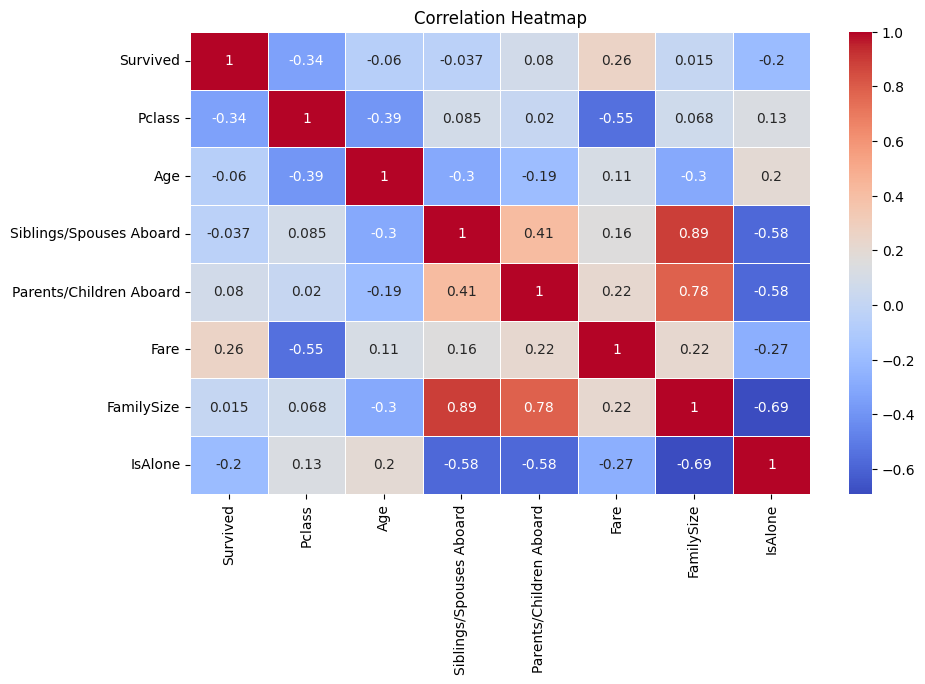

In [22]:
# Correlation matrix - HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# CROSS-TABULATION - Categorial Relationships
# Survival rate by passenger class
print("\nSurvival Rate by Pclass:")
print(pd.crosstab(data['Pclass'], data['Survived'], normalize='index') * 100)

# Survival rate by title
print("\nSurvival Rate by Title:")
print(pd.crosstab(data['Title'], data['Survived'], normalize='index') * 100)


Survival Rate by Pclass:
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.564682  24.435318

Survival Rate by Title:
Survived          0          1
Title                         
Master    42.500000  57.500000
Miss      29.729730  70.270270
Mr        84.210526  15.789474
Mrs       20.634921  79.365079
Rare      65.217391  34.782609


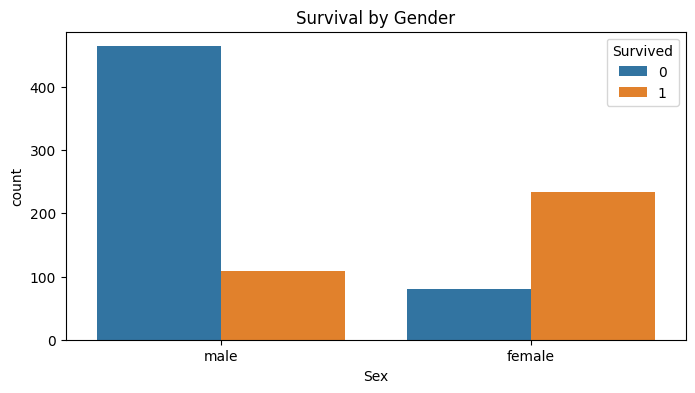

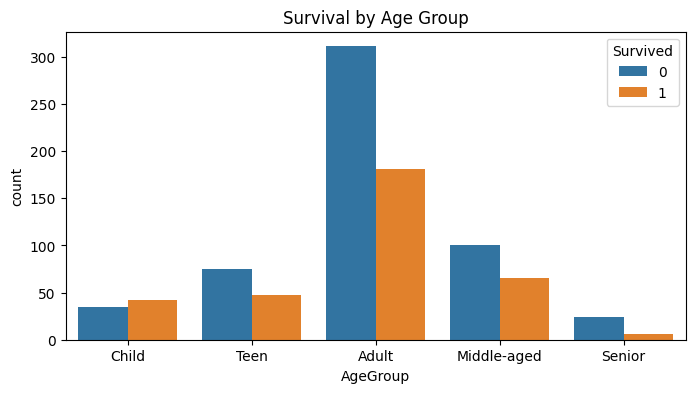

In [24]:
# Visual Categorical Distributions
# Survival by Sex
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

# Survival by AgeGroup
plt.figure(figsize=(8, 4))
sns.countplot(x='AgeGroup', hue='Survived', data=data)
plt.title('Survival by Age Group')
plt.show()

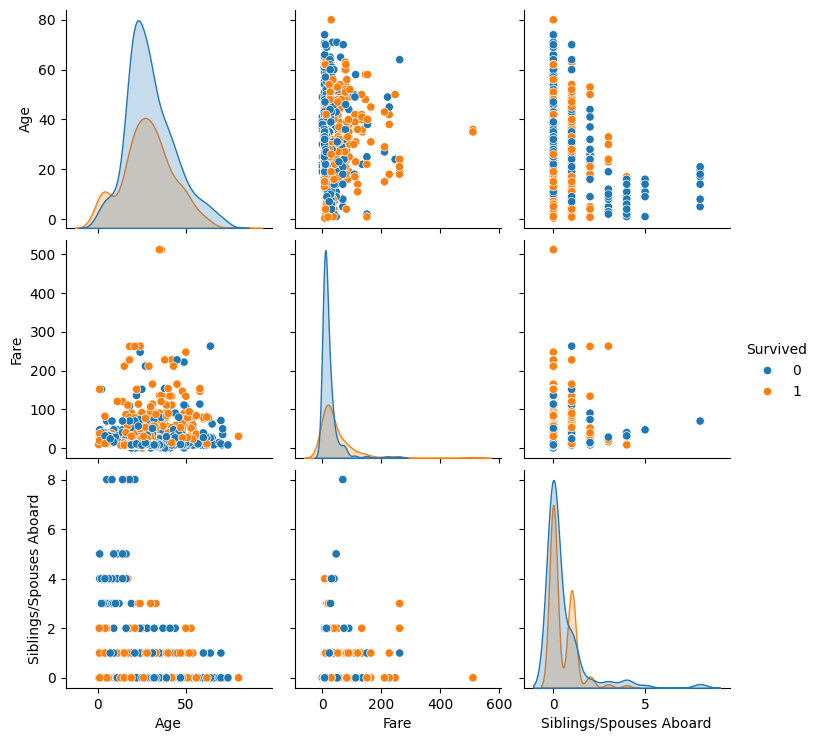

In [25]:
# Enrichment
sns.pairplot(data[['Age', 'Fare', 'Siblings/Spouses Aboard', 'Survived']], hue='Survived')

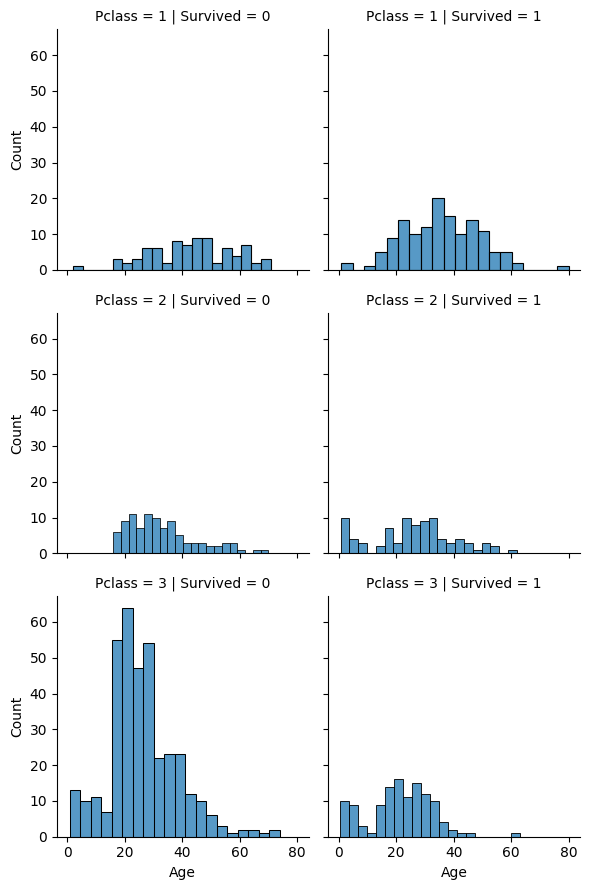

In [26]:
g = sns.FacetGrid(data, col='Survived', row='Pclass', height=3)
g.map(sns.histplot, 'Age', bins=20)

In [27]:
data.to_csv("titanic_cleaned.csv", index=False)

### FINANCE DATASET


In [30]:
# Data Ingestion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('all_stocks_5yr.csv')

In [31]:
data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [32]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [33]:
# initial inspection
print("Data Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Data Shape: (619040, 7)

Data Types:
 date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

Missing Values:
 date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [34]:
# Ensure date is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort data by date
data = data.sort_values('date').reset_index(drop=True)

# Now safe to forward-fill missing OHLC values
data[['open', 'high', 'low']] = data[['open', 'high', 'low']].ffill()

In [35]:
print(data.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [36]:
# FEATURE ENGINEERING
# Extract time-based features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6
data['is_weekend'] = data['dayofweek'].isin([5, 6]).astype(int)

In [37]:
# returns and log-returns
data['daily_return'] = data['close'].pct_change()
data['log_return'] = np.log(data['close'] / data['close'].shift(1))

In [38]:
# SMA AND EMA Calculation
data['sma_5'] = data['close'].rolling(window=5).mean()
data['sma_20'] = data['close'].rolling(window=20).mean()
data['ema_10'] = data['close'].ewm(span=10, adjust=False).mean()

In [39]:
# Volatility (Rolling STD)
data['volatility_10'] = data['daily_return'].rolling(window=10).std()

In [40]:
# drop NA rows
data.dropna(inplace=True)

In [41]:
# EDA

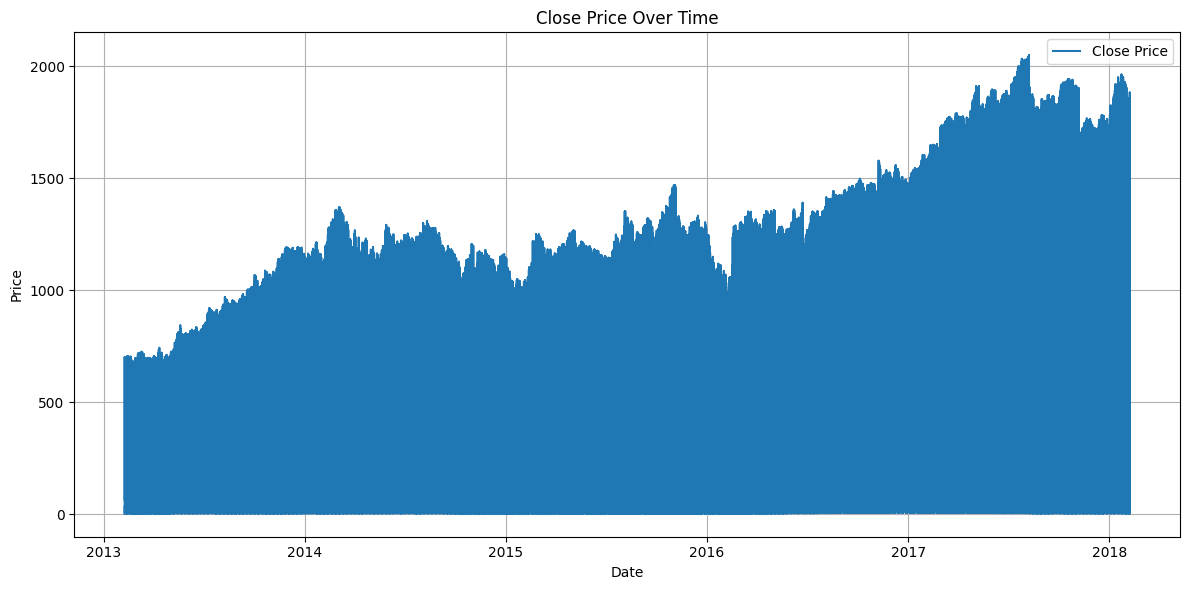

In [42]:
# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

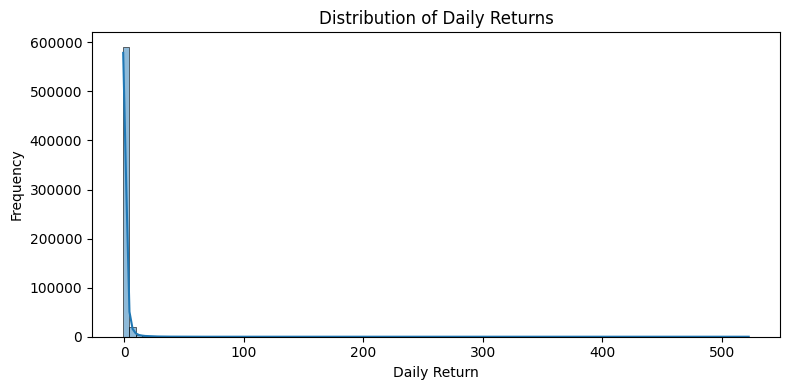

In [43]:
# Daily Returns Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['daily_return'], bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

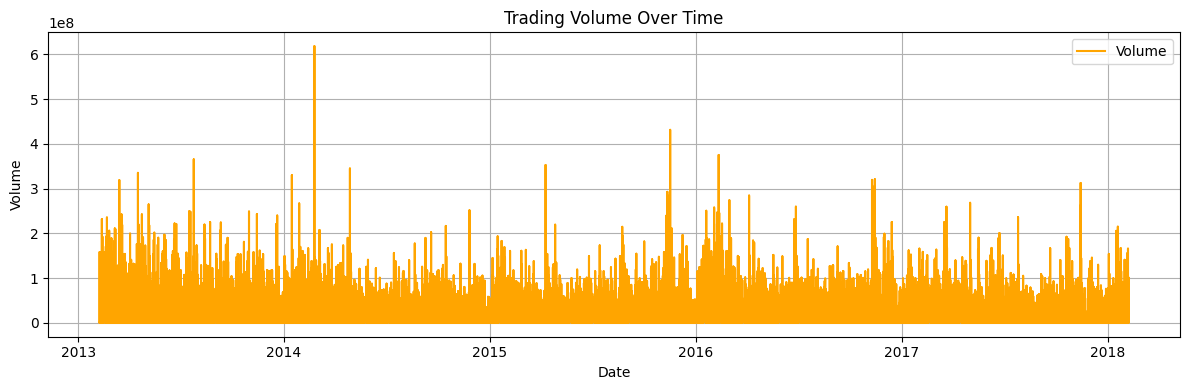

In [44]:
# Volume Over Time
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['volume'], color='orange', label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

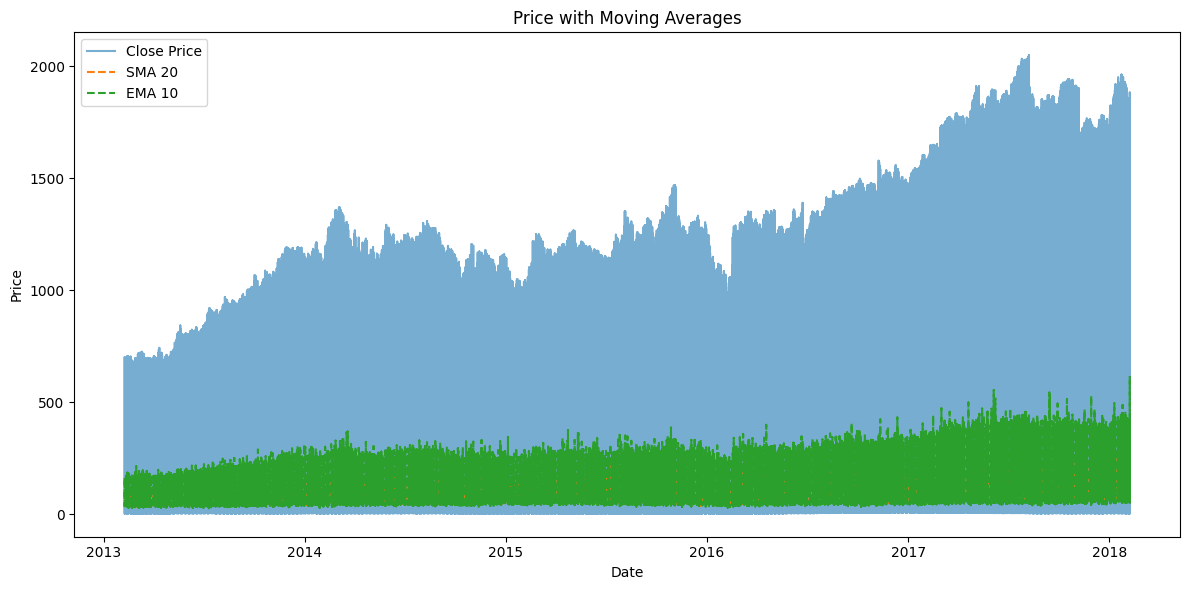

In [45]:
#Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], label='Close Price', alpha=0.6)
plt.plot(data['date'], data['sma_20'], label='SMA 20', linestyle='--')
plt.plot(data['date'], data['ema_10'], label='EMA 10', linestyle='--')
plt.title('Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

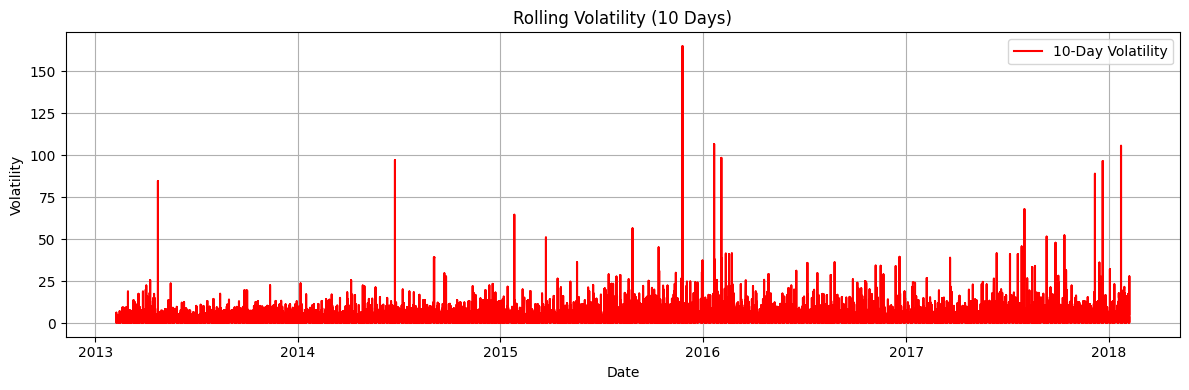

In [46]:
# volatility
plt.figure(figsize=(12, 4))
plt.plot(data['date'], data['volatility_10'], label='10-Day Volatility', color='red')
plt.title('Rolling Volatility (10 Days)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# Save as CSV
data.to_csv('finance_eda.csv', index=True)

# Save as Pickle (preserves dtypes and index)
data.to_pickle('finance_eda.pkl')